# Exploratory Analysis of Stanford Question and Answer Dataset

In [118]:
import gzip
import jsonlines
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [2]:
path = r"C:\Users\jimmc\Downloads\train-v2.0.json".replace('\\','/')
data = pd.read_json(path)

In [42]:
with open(path, 'r') as f:
    json_data = json.load(f)

## Analysis of Json Formating

In [10]:
data.head()

,version,data
0,v2.0,"{'title': 'Beyoncé', 'paragraphs': [{'qas': [{..."
1,v2.0,"{'title': 'Frédéric_Chopin', 'paragraphs': [{'..."
2,v2.0,{'title': 'Sino-Tibetan_relations_during_the_M...
3,v2.0,"{'title': 'IPod', 'paragraphs': [{'qas': [{'qu..."
4,v2.0,{'title': 'The_Legend_of_Zelda:_Twilight_Princ...


At the highest level the json has a version key and a data key

In [11]:
data['data'][0].keys()

dict_keys(['title', 'paragraphs'])

Inside the data key there are two keys; 'title' and paragraphs

In [12]:
data['data'][0]['title']

'Beyoncé'

The title is a general a word or phrase describing the questions and answers in that section

In [13]:
data['data'][0]['paragraphs']

[{'qas': [{'question': 'When did Beyonce start becoming popular?',
    'id': '56be85543aeaaa14008c9063',
    'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
    'is_impossible': False},
   {'question': 'What areas did Beyonce compete in when she was growing up?',
    'id': '56be85543aeaaa14008c9065',
    'answers': [{'text': 'singing and dancing', 'answer_start': 207}],
    'is_impossible': False},
   {'question': "When did Beyonce leave Destiny's Child and become a solo singer?",
    'id': '56be85543aeaaa14008c9066',
    'answers': [{'text': '2003', 'answer_start': 526}],
    'is_impossible': False},
   {'question': 'In what city and state did Beyonce  grow up? ',
    'id': '56bf6b0f3aeaaa14008c9601',
    'answers': [{'text': 'Houston, Texas', 'answer_start': 166}],
    'is_impossible': False},
   {'question': 'In which decade did Beyonce become famous?',
    'id': '56bf6b0f3aeaaa14008c9602',
    'answers': [{'text': 'late 1990s', 'answer_start': 276}],
    'is_imposs

inside of paragraphs there is a python list of questions and answers and context paragraphs associate to the question and answer pairs

In [15]:
data['data'][0]['paragraphs'][0]

{'qas': [{'question': 'When did Beyonce start becoming popular?',
   'id': '56be85543aeaaa14008c9063',
   'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
   'is_impossible': False},
  {'question': 'What areas did Beyonce compete in when she was growing up?',
   'id': '56be85543aeaaa14008c9065',
   'answers': [{'text': 'singing and dancing', 'answer_start': 207}],
   'is_impossible': False},
  {'question': "When did Beyonce leave Destiny's Child and become a solo singer?",
   'id': '56be85543aeaaa14008c9066',
   'answers': [{'text': '2003', 'answer_start': 526}],
   'is_impossible': False},
  {'question': 'In what city and state did Beyonce  grow up? ',
   'id': '56bf6b0f3aeaaa14008c9601',
   'answers': [{'text': 'Houston, Texas', 'answer_start': 166}],
   'is_impossible': False},
  {'question': 'In which decade did Beyonce become famous?',
   'id': '56bf6b0f3aeaaa14008c9602',
   'answers': [{'text': 'late 1990s', 'answer_start': 276}],
   'is_impossible': False},
  {'q

In [16]:
data['data'][0]['paragraphs'][0].keys()

dict_keys(['qas', 'context'])

Each item in the python list is a dictionary with 2 keys; qas and context; qas is the the key to the list of queation and answers, while context is the paragraph which has the answers to the questions

In [18]:
data['data'][0]['paragraphs'][0]['qas'][0]

{'question': 'When did Beyonce start becoming popular?',
 'id': '56be85543aeaaa14008c9063',
 'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
 'is_impossible': False}

In [19]:
data['data'][0]['paragraphs'][0]['qas'][0].keys()

dict_keys(['question', 'id', 'answers', 'is_impossible'])

In [21]:
#using context paragraph and the answer starting char with answer text length to get answer text from context
data['data'][0]['paragraphs'][0]['context'][269:269+len(data['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text'])]

'in the late 1990s'

Each item in the qas list is a dictionary with the keys 'question', 'id', 'answers', 'is_impossible'; question is a the text of the question, id is an alpha numeric id, answer is a list of dictionaries containing the answer text and the starting character in the context paragraph where that answer text is found and you can see how the starting character and the answer text length can be used to retrieve the answer text from the context paragraph; is_impossible is a boolean flag to say if the answer is not in the paragraph for adversarial trianing.  

## Data Statistics

In [5]:
data.shape

(442, 2)

The data shape shows us there are 442 of these "title"/"paragraphs" pairs of containing questions and answers from context paragraphs

In [28]:
#What are all the titles?  
title_names = []

for row in data['data']:
    title_names.append(row['title'])

In [29]:
#Here is a list of all the titles in the data sorted in order
title_names = sorted(title_names)
title_names

['2008_Sichuan_earthquake',
 '2008_Summer_Olympics_torch_relay',
 '51st_state',
 'ASCII',
 'A_cappella',
 'Adolescence',
 'Adult_contemporary_music',
 'Affirmative_action_in_the_United_States',
 'Age_of_Enlightenment',
 'Aircraft_carrier',
 'Airport',
 'Alaska',
 'Alexander_Graham_Bell',
 'Alfred_North_Whitehead',
 'Alloy',
 'Alps',
 'Alsace',
 'American_Idol',
 'Animal',
 'Ann_Arbor,_Michigan',
 'Annelid',
 'Antarctica',
 'Antenna_(radio)',
 'Anthropology',
 'Anti-aircraft_warfare',
 'Antibiotics',
 'Apollo',
 'Appalachian_Mountains',
 'Architecture',
 'Arena_Football_League',
 'Armenia',
 'Armenians',
 'Arnold_Schwarzenegger',
 'Arsenal_F.C.',
 'Ashkenazi_Jews',
 'Asphalt',
 'Aspirated_consonant',
 'Association_football',
 'Asthma',
 'Athanasius_of_Alexandria',
 'Atlantic_City,_New_Jersey',
 'Avicenna',
 'BBC_Television',
 'Bacteria',
 'Baptists',
 'Beer',
 'BeiDou_Navigation_Satellite_System',
 'Bermuda',
 'Bern',
 'Beyoncé',
 'Bill_%26_Melinda_Gates_Foundation',
 'Biodiversity',
 '

In [30]:
#Number of titles should be 442 and it is
len(title_names)

442

In [32]:
#Count of context paragraphs
paragraphs = 0

for row in data['data']:
    paragraphs += len(row['paragraphs'])

paragraphs    

19035

In [33]:
#Count of question and answer pairs
total_qanda = 0

for row in data['data']:
    for qanda in row['paragraphs']:
        total_qanda += len(qanda['qas'])
        
total_qanda

130319

In [38]:
#Count total Impossible and Possible Q and A's
impossibles = 0
possibles = 0
for row in data['data']:
    for qanda in row['paragraphs']:
        for q in qanda['qas']:
            if q['is_impossible'] == True:
                impossibles += 1
            else:
                possibles += 1
print(f"Impossibles: {impossibles}")
print(f"Possibles: {possibles}")

Impossibles: 43498
Possibles: 86821


### Context Paragraph Text Statistics

In [75]:
df_with_context = pd.json_normalize(json_data, ['data','paragraphs'])
df_with_context

,qas,context
0,"[{'question': 'When did Beyonce start becoming popular?', 'id': '56be85543aeaaa14008c9063', 'ans...","Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an America..."
1,"[{'question': 'After her second solo album, what other entertainment venture did Beyonce explore...","Following the disbandment of Destiny's Child in June 2005, she released her second solo album, B..."
2,"[{'question': 'In her music, what are some recurring elements in them?', 'id': '56be88473aeaaa14...","A self-described ""modern-day feminist"", Beyoncé creates songs that are often characterized by th..."
3,"[{'question': 'Beyonce's younger sibling also sang with her in what band?', 'id': '56be892d3aeaa...","Beyoncé Giselle Knowles was born in Houston, Texas, to Celestine Ann ""Tina"" Knowles (née Beyincé..."
4,"[{'question': 'What town did Beyonce go to school in?', 'id': '56be8a583aeaaa14008c9094', 'answe...","Beyoncé attended St. Mary's Elementary School in Fredericksburg, Texas, where she enrolled in da..."
...,...,...
19030,"[{'plausible_answers': [{'text': '1643', 'answer_start': 14}], 'question': 'When was Descartes b...",Isaac Newton (1643–1727) inherited Descartes' mechanical conception of matter. In the third of h...
19031,"[{'plausible_answers': [{'text': 'the early 20th century', 'answer_start': 111}], 'question': 'W...","There is an entire literature concerning the ""structure of matter"", ranging from the ""electrical..."
19032,"[{'plausible_answers': [{'text': 'particle', 'answer_start': 151}], 'question': 'What field of p...","In the late 19th century with the discovery of the electron, and in the early 20th century, with..."
19033,"[{'plausible_answers': [{'text': 'four', 'answer_start': 42}], 'question': 'How many quarks and ...","These quarks and leptons interact through four fundamental forces: gravity, electromagnetism, we..."


In [74]:

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [109]:
freq_dict = {}
context_word_counts = []
context_char_counts = []
def count_tokens(text):
    
    context_char_counts.append(len(text))
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    context_word_counts.append(len(tokens))
    
    for token in tokens:                       
        if not freq_dict.get(token,0):
            freq_dict[token] = 1
        else:
            freq_dict[token] += 1

In [77]:
df_with_context['Cleaned_Context'] = df_with_context['context'].apply(lambda x: clean_text(x))
df_with_context.head()

,qas,context,Cleaned_Context
0,"[{'question': 'When did Beyonce start becoming popular?', 'id': '56be85543aeaaa14008c9063', 'ans...","Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an America...",beyoncé gisel knowlescart biːˈjɒnseɪ beeyonsay born septemb 4 1981 american singer songwrit reco...
1,"[{'question': 'After her second solo album, what other entertainment venture did Beyonce explore...","Following the disbandment of Destiny's Child in June 2005, she released her second solo album, B...",follow disband destini child june 2005 releas second solo album bday 2006 contain hit déjà vu ir...
2,"[{'question': 'In her music, what are some recurring elements in them?', 'id': '56be88473aeaaa14...","A self-described ""modern-day feminist"", Beyoncé creates songs that are often characterized by th...",selfdescrib modernday feminist beyoncé creat song often character theme love relationship monoga...
3,"[{'question': 'Beyonce's younger sibling also sang with her in what band?', 'id': '56be892d3aeaa...","Beyoncé Giselle Knowles was born in Houston, Texas, to Celestine Ann ""Tina"" Knowles (née Beyincé...",beyoncé gisel knowl born houston texa celestin ann tina knowl née beyincé hairdress salon owner ...
4,"[{'question': 'What town did Beyonce go to school in?', 'id': '56be8a583aeaaa14008c9094', 'answe...","Beyoncé attended St. Mary's Elementary School in Fredericksburg, Texas, where she enrolled in da...",beyoncé attend st mari elementari school fredericksburg texa enrol danc class sing talent discov...


In [130]:
df_with_context['context'].apply(lambda x: count_tokens(x))
print("")

In [116]:
print(f"Min number of words in context paragraphs: {min(context_word_counts)}")
print(f"Max number of words in context paragraphs: {max(context_word_counts)}")
print(f"Mean number of words in context paragraphs: {sum(context_word_counts)/len(context_word_counts)}")

Min number of words in context paragraphs: 20
Max number of words in context paragraphs: 650
Mean number of words in context paragraphs: 116.70979774100341


Text(0.5, 1.0, 'Histogram of Context Paragraph Word Counts')

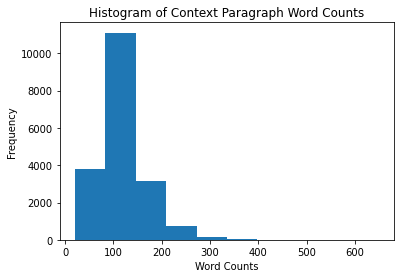

In [123]:
plt.hist(context_word_counts, bins=10)
plt.xlabel('Word Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Context Paragraph Word Counts")

In [117]:
print(f"Min number of chars in context paragraphs: {min(context_char_counts)}")
print(f"Max number of chars in context paragraphs: {max(context_char_counts)}")
print(f"Mean number of chars in context paragraphs: {sum(context_char_counts)/len(context_char_counts)}")

Min number of chars in context paragraphs: 151
Max number of chars in context paragraphs: 3706
Mean number of chars in context paragraphs: 735.5478854741266


Text(0.5, 1.0, 'Histogram of Context Paragraph Chartacter Counts')

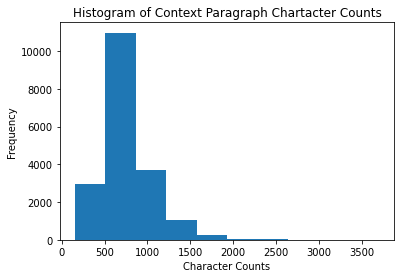

In [125]:
plt.hist(context_char_counts, bins=10)
plt.xlabel('Character Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Context Paragraph Chartacter Counts")

In [87]:
#Most Freguent Words in the context Paragraphs Including Stopwords
sorted(freq_dict.items(),key=lambda x:x[1], reverse=True)

[('the', 173936),
 ('of', 87841),
 ('and', 71050),
 ('in', 61671),
 ('to', 48901),
 ('a', 40767),
 ('as', 21808),
 ('is', 20222),
 ('was', 18487),
 ('by', 17048),
 ('for', 16577),
 ('that', 15880),
 ('with', 15438),
 ('on', 13909),
 ('from', 11915),
 ('are', 10719),
 ('it', 9007),
 ('or', 8951),
 ('which', 8911),
 ('were', 8889),
 ('at', 8328),
 ('an', 8046),
 ('be', 7323),
 ('this', 6620),
 ('his', 6064),
 ('also', 5849),
 ('has', 5759),
 ('its', 5686),
 ('have', 5680),
 ('their', 5560),
 ('not', 5536),
 ('had', 5115),
 ('other', 4834),
 ('but', 4715),
 ('such', 4507),
 ('he', 4445),
 ('one', 4399),
 ('first', 4242),
 ('new', 4147),
 ('they', 4140),
 ('most', 4048),
 ('been', 3896),
 ('more', 3829),
 ('city', 3697),
 ('some', 3690),
 ('after', 3441),
 ('during', 3380),
 ('all', 3375),
 ('into', 3369),
 ('many', 3336),
 ('who', 3299),
 ('than', 3069),
 ('these', 3053),
 ('two', 2956),
 ('states', 2954),
 ('used', 2928),
 ('between', 2925),
 ('there', 2898),
 ('can', 2849),
 ('when', 28

In [92]:
freq_dict_no_stop = {}
def count_tokens_no_stops(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = [token for token in tokens if token not in stopwords]
    for token in tokens:
        if not freq_dict_no_stop.get(token,0):
            freq_dict_no_stop[token] = 1
        else:
            freq_dict_no_stop[token] += 1
    

In [131]:
df_with_context['context'].apply(lambda x: count_tokens_no_stops(x))
print("")

In [96]:
#Most Frequent Words in Contextparagraph with Stopwords Removed
sorted(freq_dict_no_stop.items(),key=lambda x:x[1], reverse=True)

[('also', 5849),
 ('one', 4399),
 ('first', 4242),
 ('new', 4147),
 ('city', 3697),
 ('many', 3336),
 ('two', 2956),
 ('states', 2954),
 ('used', 2928),
 ('may', 2808),
 ('time', 2677),
 ('state', 2597),
 ('world', 2554),
 ('united', 2480),
 ('century', 2466),
 ('would', 2378),
 ('war', 2377),
 ('years', 2123),
 ('including', 2107),
 ('known', 2101),
 ('however', 2062),
 ('government', 1990),
 ('use', 1977),
 ('people', 1941),
 ('early', 1886),
 ('became', 1876),
 ('system', 1843),
 ('since', 1820),
 ('us', 1816),
 ('later', 1774),
 ('made', 1741),
 ('well', 1726),
 ('number', 1708),
 ('part', 1691),
 ('population', 1673),
 ('called', 1665),
 ('national', 1649),
 ('north', 1647),
 ('often', 1636),
 ('several', 1541),
 ('major', 1534),
 ('three', 1528),
 ('power', 1522),
 ('university', 1505),
 ('million', 1501),
 ('although', 1473),
 ('american', 1459),
 ('south', 1455),
 ('british', 1454),
 ('year', 1437),
 ('area', 1420),
 ('music', 1394),
 ('period', 1388),
 ('large', 1338),
 ('incl

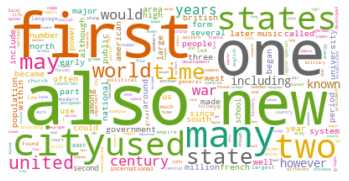

In [99]:
#Word Cloud of Non stopwords from the Context Paragraph
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2")
wc.generate_from_frequencies(dict(sorted(freq_dict_no_stop.items(),key=lambda x:x[1], reverse=True)))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [102]:
#Unique Words from Context Paragraph
unique_words = [word for word, count in sorted(freq_dict_no_stop.items(),key=lambda x:x[1], reverse=True) if count == 1]
unique_words

['knowlescarter',
 'biːˈjɒnseɪ',
 'beeyonsay',
 'girlgroup',
 'alterego',
 'recordsetting',
 'mellower',
 'beyincé',
 'cajun',
 'broussard',
 'fredericksburg',
 'darlette',
 'humming',
 '1516yearolds',
 'alief',
 'elsik',
 'latavia',
 'allgirl',
 'rapped',
 'frager',
 'wigginss',
 '43rd',
 'letoya',
 'charlies',
 'bestcharting',
 'hopera',
 'mekhi',
 'bizet',
 '663000',
 'foxxy',
 'goldmember',
 'gooding',
 'goodings',
 'lyte',
 '317000',
 'recordtying',
 'rapsung',
 'twentyfifth',
 '541000',
 'preconcert',
 'halos',
 'brokenhearted',
 'mobo',
 'improvising',
 'addicts',
 'obsessive',
 'heeding',
 '310000',
 'romancethemed',
 'xlvii',
 'superdome',
 'tweeted',
 '268000',
 'warnerchappell',
 'thenupcoming',
 'mostsuccessful',
 'winehouses',
 'electrorb',
 'bulimia',
 'insecurities',
 'coheadlining',
 'saddest',
 'unbuttoned',
 'blazer',
 '8868',
 'googled',
 'lifeandtimescom',
 'bic',
 '4040',
 'tumblr',
 'trayvon',
 'tedxeuston',
 'bossy',
 'nkosazana',
 'dlaminizuma',
 'mostpowerful',

In [107]:
#Number of unique words from Context Paragraph
print(f"Number of unique words from Context Paragraphs: {len(unique_words)}")

Number of unique words from Context Paragraphs: 47477


### Question Text Statistics

In [142]:
df_q_and_a = pd.json_normalize(json_data, ['data','paragraphs', 'qas'])
df_q_and_a.head()

,question,id,answers,is_impossible,plausible_answers
0,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,"[{'text': 'in the late 1990s', 'answer_start': 269}]",False,NaN
1,What areas did Beyonce compete in when she was growing up?,56be85543aeaaa14008c9065,"[{'text': 'singing and dancing', 'answer_start': 207}]",False,NaN
2,When did Beyonce leave Destiny's Child and become a solo singer?,56be85543aeaaa14008c9066,"[{'text': '2003', 'answer_start': 526}]",False,NaN
3,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,"[{'text': 'Houston, Texas', 'answer_start': 166}]",False,NaN
4,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,"[{'text': 'late 1990s', 'answer_start': 276}]",False,NaN


In [150]:
freq_dict_questions = {}
questions_word_counts = []
questions_char_counts = []
def count_tokens_question(text):
    char_length = len(text)
    questions_char_counts.append(len(text))
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    questions_word_counts.append(len(tokens))
    
    for token in tokens:                       
        if not freq_dict_questions.get(token,0):
            freq_dict_questions[token] = 1
        else:
            freq_dict_questions[token] += 1
    return char_length 

In [151]:
df_q_and_a["Character_Length"] = df_q_and_a['question'].apply(lambda x: count_tokens_question(x))
df_q_and_a.head()

,question,id,answers,is_impossible,plausible_answers,Character_Length
0,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,"[{'text': 'in the late 1990s', 'answer_start': 269}]",False,NaN,40
1,What areas did Beyonce compete in when she was growing up?,56be85543aeaaa14008c9065,"[{'text': 'singing and dancing', 'answer_start': 207}]",False,NaN,58
2,When did Beyonce leave Destiny's Child and become a solo singer?,56be85543aeaaa14008c9066,"[{'text': '2003', 'answer_start': 526}]",False,NaN,64
3,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,"[{'text': 'Houston, Texas', 'answer_start': 166}]",False,NaN,45
4,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,"[{'text': 'late 1990s', 'answer_start': 276}]",False,NaN,42


In [134]:
print(f"Min number of words in questions: {min(questions_word_counts)}")
print(f"Max number of words in questions: {max(questions_word_counts)}")
print(f"Mean number of words in questions: {sum(questions_word_counts)/len(questions_word_counts)}")

Min number of words in questions: 1
Max number of words in questions: 40
Mean number of words in questions: 9.939026542560947


Text(0.5, 1.0, 'Histogram of Question Word Counts')

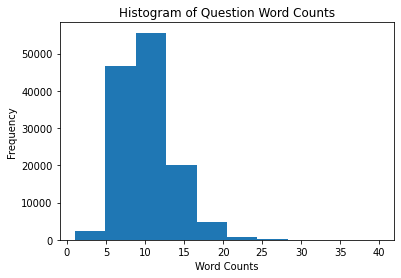

In [135]:
plt.hist(questions_word_counts, bins=10)
plt.xlabel('Word Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Question Word Counts")

In [136]:
print(f"Min number of chars in questions: {min(questions_char_counts)}")
print(f"Max number of chars in questions: {max(questions_char_counts)}")
print(f"Mean number of chars in questions: {sum(questions_char_counts)/len(questions_char_counts)}")

Min number of chars in questions: 1
Max number of chars in questions: 25651
Mean number of chars in questions: 58.50773870272178


Text(0.5, 1.0, 'Histogram of Question Character Counts')

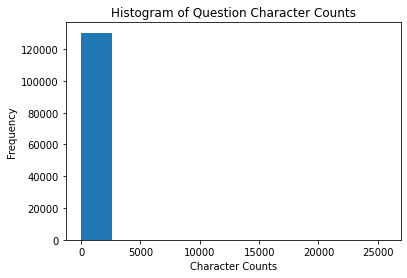

In [140]:
plt.hist(questions_char_counts, bins=10)
plt.xlabel('Character Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Question Character Counts")

There appears to be a very long question; further investigation needs to be done here; There is also a very short question and futher investigation is needed

In [159]:
df_q_and_a[df_q_and_a["Character_Length"] > 25000]

,question,id,answers,is_impossible,plausible_answers,Character_Length
107709,...,572fdefb947a6a140053cd8d,"[{'text': 'horizontal dipole', 'answer_start': 215}]",False,NaN,25651


In [157]:
df_q_and_a[df_q_and_a["Character_Length"] > 25000].to_csv("C:\\Users\\jimmc\\Downloads\\huge question.csv")

In [160]:
df_q_and_a[df_q_and_a["Character_Length"] == 1]

,question,id,answers,is_impossible,plausible_answers,Character_Length
50679,d,57262473271a42140099d4ed,"[{'text': 'the Gre', 'answer_start': 1090}]",False,NaN,1


In [158]:
df_q_and_a[df_q_and_a["Character_Length"] == 1].to_csv("C:\\Users\\jimmc\\Downloads\\small question.csv")

Seems like the long question is a long white space question and the short question is a single letter.  I have the IDs.  I need to find these with their context for more information.  I can remove these if need be.  

In [162]:
#Most Frequent words for questions with stop words

sorted(freq_dict_questions.items(),key=lambda x:x[1], reverse=True)

[('the', 92688),
 ('what', 77700),
 ('of', 49181),
 ('in', 38923),
 ('to', 27560),
 ('was', 24777),
 ('is', 24456),
 ('did', 23127),
 ('a', 16551),
 ('who', 13919),
 ('how', 13505),
 ('for', 10906),
 ('and', 10261),
 ('when', 9863),
 ('which', 8744),
 ('are', 8585),
 ('many', 7816),
 ('on', 6993),
 ('does', 6978),
 ('', 6744),
 ('were', 6281),
 ('with', 6239),
 ('that', 6234),
 ('by', 5997),
 ('from', 5987),
 ('where', 5577),
 ('as', 5517),
 ('year', 5450),
 ('do', 4933),
 ('have', 4620),
 ('be', 4521),
 ('first', 3840),
 ('name', 3662),
 ('an', 3559),
 ('not', 3526),
 ('at', 3513),
 ('used', 3239),
 ('has', 3218),
 ('type', 3043),
 ('can', 2507),
 ('most', 2412),
 ('during', 2409),
 ('new', 2362),
 ('people', 2280),
 ('other', 2188),
 ('city', 2156),
 ('their', 2099),
 ('after', 2089),
 ('one', 2016),
 ('it', 1983),
 ('why', 1939),
 ('use', 1891),
 ('its', 1862),
 ('two', 1828),
 ('much', 1819),
 ('called', 1748),
 ('his', 1736),
 ('about', 1664),
 ('century', 1604),
 ('war', 1580),
 

In [164]:
freq_dict_questions_no_stop = {}
def count_tokens_questions_no_stops(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = [token for token in tokens if token not in stopwords]
    for token in tokens:
        if not freq_dict_questions_no_stop.get(token,0):
            freq_dict_questions_no_stop[token] = 1
        else:
            freq_dict_questions_no_stop[token] += 1

In [165]:
df_q_and_a['question'].apply(lambda x: count_tokens_questions_no_stops(x))
print("")

In [166]:
sorted(freq_dict_questions_no_stop.items(),key=lambda x:x[1], reverse=True)

[('many', 7816),
 ('', 6744),
 ('year', 5450),
 ('first', 3840),
 ('name', 3662),
 ('used', 3239),
 ('type', 3043),
 ('new', 2362),
 ('people', 2280),
 ('city', 2156),
 ('one', 2016),
 ('use', 1891),
 ('two', 1828),
 ('much', 1819),
 ('called', 1748),
 ('century', 1604),
 ('war', 1580),
 ('us', 1538),
 ('time', 1507),
 ('country', 1469),
 ('group', 1422),
 ('term', 1379),
 ('system', 1377),
 ('state', 1357),
 ('located', 1348),
 ('part', 1329),
 ('world', 1316),
 ('made', 1307),
 ('language', 1306),
 ('known', 1289),
 ('kind', 1276),
 ('population', 1181),
 ('percentage', 1164),
 ('states', 1162),
 ('long', 1142),
 ('would', 1110),
 ('become', 1102),
 ('government', 1085),
 ('american', 1067),
 ('area', 1023),
 ('school', 973),
 ('found', 971),
 ('considered', 968),
 ('period', 955),
 ('take', 948),
 ('begin', 942),
 ('work', 922),
 ('company', 922),
 ('law', 921),
 ('years', 920),
 ('along', 914),
 ('music', 911),
 ('university', 904),
 ('make', 878),
 ('united', 864),
 ('created', 85

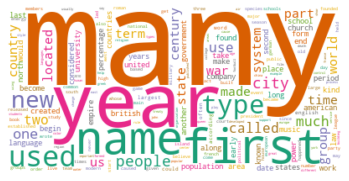

In [167]:
#Word Cloud of for question words without stopwords
wc = WordCloud(background_color="white", colormap="Dark2")
wc.generate_from_frequencies(dict(sorted(freq_dict_questions_no_stop.items(),key=lambda x:x[1], reverse=True)))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [168]:
#Unique Words from Questions
unique_words = [word for word, count in sorted(freq_dict_questions_no_stop.items(),key=lambda x:x[1], reverse=True) if count == 1]
unique_words

['alterego',
 'descendent',
 'arcadian',
 'acadian',
 'soloist',
 'robertson',
 'tyme',
 'charlies',
 'mekhi',
 'goldmembers',
 'tempations',
 'disban',
 'lades',
 'irreplaceable',
 'amsasha',
 'buget',
 'larter',
 'gaga',
 'spokespeople',
 'kaddafi',
 'roseland',
 'tweets',
 'winehouse',
 'miscarriage',
 'zs',
 'saddest',
 'mostwatched',
 'bic',
 'cries',
 'jayz',
 'acquittal',
 '4040',
 'bossy',
 'flawless',
 'merkel',
 'whoms',
 'timbre',
 'pareles',
 'velvety',
 'dabble',
 'cowriting',
 'hula',
 'skirt',
 'inspiring',
 'winfrey',
 'basquiat',
 'singerdancers',
 'bootylicious',
 'offstage',
 'cowrite',
 'bestdressed',
 'blackface',
 'lightened',
 'retouched',
 'heirapparent',
 'nicky',
 'hteir',
 'gwyneth',
 'pepsis',
 'lessard',
 'advetisments',
 'perfumes',
 'emporio',
 'armani',
 'bayonces',
 'grandmas',
 'backtoschool',
 'starwave',
 'topshops',
 'rowland',
 'cosmetology',
 'tshirt',
 'bless',
 'clooney',
 'fooddonation',
 'gucci',
 'crowdfunding',
 '1837847',
 'nondirect',
 'ba

### Answer Text Statistics

In [170]:
#Length of answer Analysis next
df_answers = pd.json_normalize(json_data, ['data','paragraphs', 'qas', 'answers'])
df_answers.head()

,text,answer_start
0,in the late 1990s,269
1,singing and dancing,207
2,2003,526
3,"Houston, Texas",166
4,late 1990s,276


In [183]:
freq_dict_answers = {}
answers_word_counts = []
answers_char_counts = []
def count_tokens_answers(text):
    char_length = len(text)
    answers_char_counts.append(len(text))
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    answers_word_counts.append(len(tokens))
    
    for token in tokens:                       
        if not freq_dict_answers.get(token,0):
            freq_dict_answers[token] = 1
        else:
            freq_dict_answers[token] += 1
    return char_length

In [184]:
df_answers["Answer_Char_Length"] = df_answers['text'].apply(lambda x: count_tokens_answers(x))
df_answers.head()

,text,answer_start,Answer_Char_Length
0,in the late 1990s,269,17
1,singing and dancing,207,19
2,2003,526,4
3,"Houston, Texas",166,14
4,late 1990s,276,10


In [178]:
print(f"Min number of words in answers: {min(answers_word_counts)}")
print(f"Max number of words in answers: {max(answers_word_counts)}")
print(f"Mean number of words in answers: {sum(answers_word_counts)/len(answers_word_counts)}")

Min number of words in answers: 1
Max number of words in answers: 43
Mean number of words in answers: 3.1716865735248385


Text(0.5, 1.0, 'Histogram of Answer Word Counts')

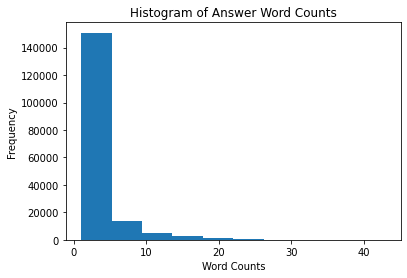

In [180]:
plt.hist(answers_word_counts, bins=10)
plt.xlabel('Word Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Answer Word Counts")

In [179]:
print(f"Min number of chars in answers: {min(answers_char_counts)}")
print(f"Max number of chars in answers: {max(answers_char_counts)}")
print(f"Mean number of chars in answers: {sum(answers_char_counts)/len(answers_char_counts)}")

Min number of chars in answers: 1
Max number of chars in answers: 239
Mean number of chars in answers: 20.149168979855105


Text(0.5, 1.0, 'Histogram of Answer Character Counts')

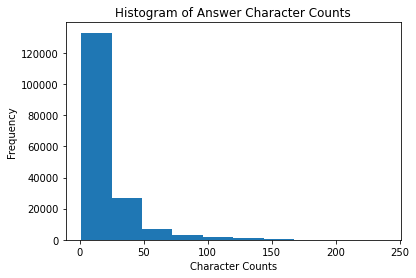

In [182]:
plt.hist(answers_char_counts, bins=10)
plt.xlabel('Character Counts')
plt.ylabel("Frequency")
plt.title("Histogram of Answer Character Counts")

In [187]:
df_answers[df_answers['Answer_Char_Length'] > 180]

,text,answer_start,Answer_Char_Length
2853,that the sudden shift of a huge quantity of water into the region could have relaxed the tension...,187,239
11161,"copper wires to provide dial-up, DSL, typically asymmetric digital subscriber line (ADSL), cable...",60,181
11174,implementing Simple Mail Transfer Protocol (SMTP) and possibly providing access to messages thro...,377,202


In [186]:
df_answers[df_answers['Answer_Char_Length'] == 1]

,text,answer_start,Answer_Char_Length
246,4,24,1
860,7,391,1
865,7,391,1
870,7,391,1
1095,3,3,1
...,...,...,...
86610,1,496,1
86651,4,1081,1
86693,7,302,1
86745,J,520,1


Looking at the answers some are very long and some are very short.  This probably not an issue.  Some answers are just numbers which is why there are answers of single words and characters

In [190]:
freq_dict_answers_no_stop = {}
def count_tokens_answers_no_stops(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = [token for token in tokens if token not in stopwords]
    for token in tokens:
        if not freq_dict_answers_no_stop.get(token,0):
            freq_dict_answers_no_stop[token] = 1
        else:
            freq_dict_answers_no_stop[token] += 1

In [192]:
df_answers['text'].apply(lambda x: count_tokens_answers_no_stops(x))
print("")

In [193]:
#Most Common Answer Words
sorted(freq_dict_answers_no_stop.items(),key=lambda x:x[1], reverse=True)


[('million', 1742),
 ('new', 1204),
 ('century', 1194),
 ('two', 1120),
 ('one', 1018),
 ('united', 1002),
 ('years', 922),
 ('three', 904),
 ('states', 842),
 ('war', 832),
 ('world', 764),
 ('state', 702),
 ('four', 674),
 ('national', 664),
 ('may', 664),
 ('john', 664),
 ('city', 658),
 ('de', 622),
 ('system', 610),
 ('university', 592),
 ('british', 586),
 ('government', 586),
 ('billion', 578),
 ('five', 568),
 ('first', 556),
 ('north', 544),
 ('bc', 534),
 ('international', 516),
 ('south', 512),
 ('general', 506),
 ('us', 500),
 ('', 484),
 ('1', 478),
 ('10', 474),
 ('law', 474),
 ('french', 472),
 ('power', 470),
 ('20', 468),
 ('east', 468),
 ('early', 460),
 ('high', 460),
 ('american', 458),
 ('church', 452),
 ('2', 452),
 ('empire', 450),
 ('people', 444),
 ('time', 444),
 ('great', 440),
 ('west', 432),
 ('school', 422),
 ('15', 418),
 ('september', 416),
 ('music', 414),
 ('house', 412),
 ('june', 408),
 ('march', 408),
 ('france', 404),
 ('union', 404),
 ('december',

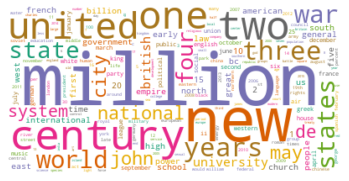

In [194]:
#Word Cloud For most common answer words
wc = WordCloud(background_color="white", colormap="Dark2")
wc.generate_from_frequencies(dict(sorted(freq_dict_answers_no_stop.items(),key=lambda x:x[1], reverse=True)))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [197]:
#Unique Words from Answers
unique_words = [word for word, count in sorted(freq_dict_answers_no_stop.items(),key=lambda x:x[1], reverse=True) if count == 1]
unique_words

[]

There are no non stop words words that only appear in one answer